## Tương quan các trường dữ liệu

#### Đọc file data_read.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Admin/aim/project_analysis_data_facebook/data/data_ready.csv')

In [3]:
df = df.reset_index(inplace = False)
df["index"] = df["index"] + 1

In [4]:
df

,index,post_id,post_text,comments,comments_full,shares,reaction_count,thích,yêu thích,thương thương,haha,wow,buồn,phẫn nộ,hour,date,day
0,1,8.992690e+14,🔴🗣️ Emile Heskey is the latest to tell the tal...,16,"[{'comment_id': '1186163892166613', 'comment_u...",101,1175,982,183,10,0.0,0.0,0.0,0.0,0,11/21/2023,Tuesday
1,2,8.992110e+14,Back-to-back PFA Premier League Fans’ Player o...,83,"[{'comment_id': '277210241476921', 'comment_ur...",31,4594,3638,902,49,1.0,4.0,0.0,0.0,22,11/20/2023,Monday
2,3,8.990810e+14,Ryan's first goal in Red 😍\n\nA look back at o...,49,"[{'comment_id': '388506910181825', 'comment_ur...",53,5157,4072,1022,55,3.0,4.0,1.0,0.0,21,11/20/2023,Monday
3,4,8.991520e+14,"Well in, Robbo 👏 #Euro2024 🔜\n\nVâng, Robbo 👏 ...",150,"[{'comment_id': '314996431472511', 'comment_ur...",61,16019,12735,3112,146,19.0,6.0,1.0,0.0,20,11/20/2023,Monday
4,5,8.991290e+14,Two years ago today... Diogo 😲\n\nNgày này hai...,211,"[{'comment_id': '1028198778438522', 'comment_u...",211,14403,11699,2506,125,45.0,26.0,1.0,1.0,19,11/20/2023,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,8.948540e+14,"""I really thank him because in this period he ...",97,"[{'comment_id': '1120275918934925', 'comment_u...",43,13139,11518,1523,77,9.0,7.0,2.0,3.0,17,11/13/2023,Monday
94,95,8.948430e+14,Jürgen Klopp confirmed Joe Gomez and Ibrahima ...,114,"[{'comment_id': '707770537958734', 'comment_ur...",34,8853,7779,934,85,3.0,9.0,39.0,4.0,16,11/13/2023,Monday
95,96,8.948350e+14,Anfield remembers.\n\nAnfield nhớ.,149,"[{'comment_id': '7303758222967701', 'comment_u...",309,16050,13364,2481,174,8.0,13.0,7.0,3.0,16,11/13/2023,Monday
96,97,8.944540e+14,Good morning 😁🔴\n\nChào buổi sáng 😁🔴,417,"[{'comment_id': '1483340398900267', 'comment_u...",124,34107,26432,7266,385,15.0,6.0,2.0,1.0,15,11/13/2023,Monday


#### Sự tương quan giữa số lượng reaction và số lượt share

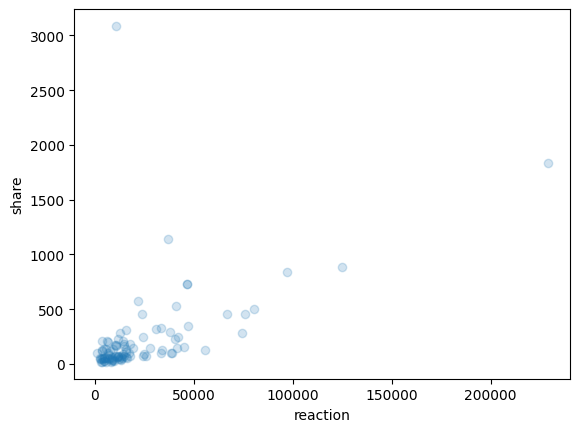

In [5]:
plt.scatter(df.reaction_count, df.shares, alpha = 0.2)

plt.xlabel("reaction")
plt.ylabel("share")

plt.show()

#### Sự  tương quan giữa số lượng reaction và số lượng comment

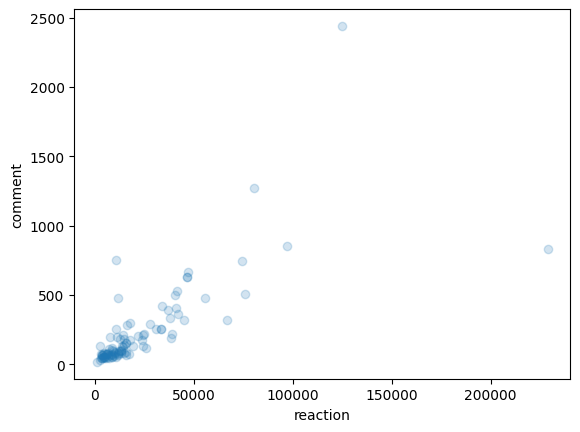

In [6]:
plt.scatter(df.reaction_count, df.comments, alpha = 0.2)

plt.xlabel("reaction")
plt.ylabel("comment")

plt.show()

#### Sự tương quan giữa số lượng biểu cảm và số lượt thích

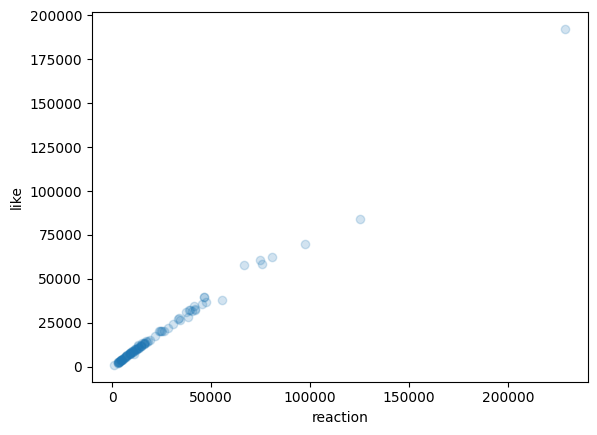

In [7]:
plt.scatter(df.reaction_count, df.thích, alpha = 0.2)

plt.xlabel("reaction")
plt.ylabel("like")

plt.show()

#### Tỉ trọng giữa các loại reaction

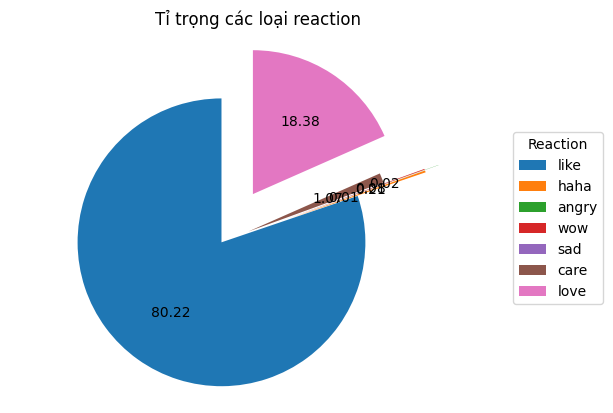

In [8]:
react_dict = {
    'like': sum(df['thích']),
    'haha': sum(df['haha']),
    'angry': sum(df['phẫn nộ']),
    'wow': sum(df['wow']),
    'sad': sum(df['buồn']),
    'care': sum(df['thương thương']),
    'love': sum(df['yêu thích'])
}
react = []
number = []

explode = (0.0, 0.5, 0.6, 0.5, 0.3, 0.2, 0.4)

for x, y in react_dict.items():
    react.append(x)
    number.append(y)

plt.pie(number, labels=['']*len(react), autopct='%.2f', explode = explode, startangle = 90)

plt.axis('equal')
plt.title("Tỉ trọng các loại reaction")

plt.legend(react, title="Reaction", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

#### Biến động số reaction

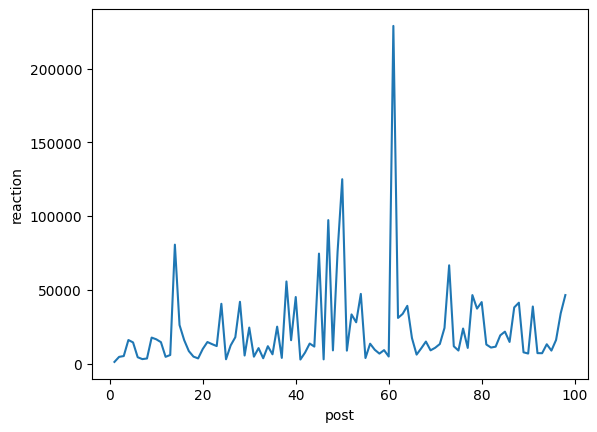

In [9]:
plt.plot(df['index'], df['reaction_count'])

plt.xlabel('post')
plt.ylabel('reaction')

plt.show()

#### Số reaction theo giờ đăng

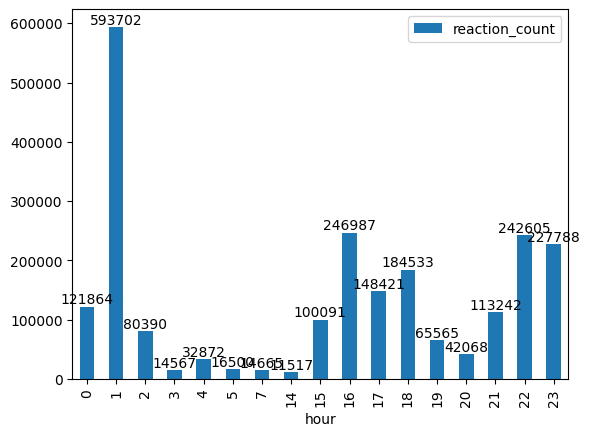

In [10]:
hour_react_plt = df[['hour', 'reaction_count']].groupby(['hour']).sum('reaction_count').plot(kind = 'bar')
for b in hour_react_plt.patches:
    hour_react_plt.annotate(str(b.get_height()), (b.get_x() + b.get_width() / 2., b.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

#### Số bài đăng theo thứ

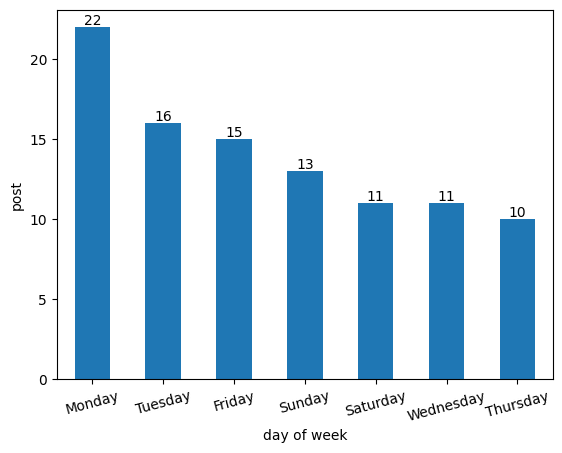

In [11]:
day_plt = df.day.value_counts().plot(kind = "bar", xlabel = 'day of week', ylabel = 'post', rot = 15)

for b in day_plt.patches:
    day_plt.annotate(b.get_height(), (b.get_x() + b.get_width() / 2, b.get_height()), ha = 'center', va = 'center', xytext = (0,5), textcoords = 'offset points')

plt.show()

#### Tỉ trọng reaction theo thứ 

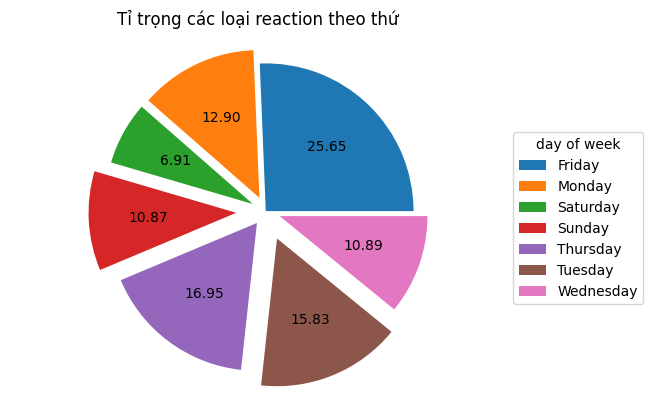

In [12]:
day_react = df[['day', 'reaction_count']].groupby(['day']).sum('reaction_count')

explode = (0.0, 0.1, 0.1, 0.2, 0.1, 0.2, 0.1)

plt.pie(day_react.reaction_count, labels = ['']*len(day_react.index), autopct = '%.2f', explode = explode)

plt.axis('equal')
plt.title("Tỉ trọng các loại reaction theo thứ")

plt.legend(day_react.index, title="day of week", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

#### Tương quan giữa giờ đăng và bài shere

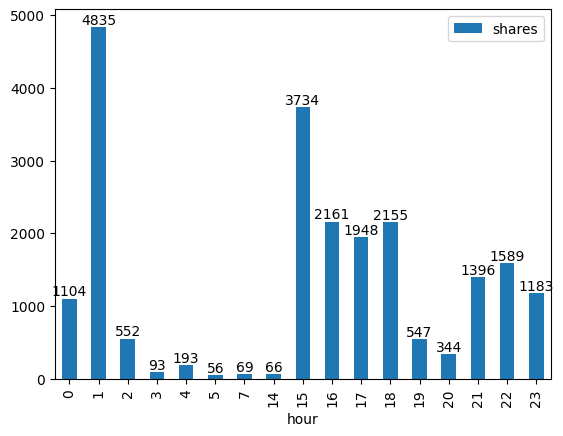

In [13]:
share_hour = df[["shares", "hour"]].groupby(["hour"]).sum("shares")
share_hour_plt = share_hour.plot(kind = "bar")
for b in share_hour_plt.patches:
    share_hour_plt.annotate(str(b.get_height()), (b.get_x() + b.get_width() / 2., b.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()